<br>

<img src="./image/Logo/logo_elia_group.png" width = 200>

<br>

# Data Visualization
<br>

&#128077; Congratulations, you have learned the basics of Python. Now you can sit back and relax. The following section is the fun part and should give you a short overview of how you can quickly visualize your data. Because this is where you get all the "WOW" ah "Ahhhs". There are three visualization libraries, which you can use to visualize your data: **matplotlib** and **seaborn** as well as **plotly**.


**Matplotlib**
- was built to emulate MATLAB graphic commands but is independent of Matplab
- one of the most often used libraries

**Seaborn**
- built on Matplotlib
- adds additional functionality
- works well with pandas data structure like DataFrames/Series

**Plotly**
- creates interactive graphs by default
- is just really cool stuff &#128526;


## Make your data ready for Visualization
<br>

But before you do fancy bar charts, boxplots or interactive graphs, you have to prepare your data in order to subsequently visualize it. But no worries, this is what you have been trained for all along. <br>
1. First, upload your data: 

In [112]:
import pandas as pd

In [202]:
energy_borders = pd.read_csv("./data/energy/physical_flow_2021_1_01.csv", sep = ";")

2. Understand your data. In this case: A positive value means export from Belgium, while negative value means import into Belgium.

In [203]:
energy_borders.head(3)

,Datetime,Resolution code,Control area,Physical Flow Value
0,2021-12-01T23:45:00+01:00,PT15M,Netherlands,-419.704
1,2021-12-01T23:45:00+01:00,PT15M,UnitedKingdom,1021.774
2,2021-12-01T23:45:00+01:00,PT15M,Luxembourg,-53.708


In [204]:
energy_borders.dtypes

Datetime                object
Resolution code         object
Control area            object
Physical Flow Value    float64
dtype: object

3. Check for missing values and replace or drop them if there are any 

In [206]:
energy_borders.isna().any().any()

False

4. Convert your Datetime data into a Datetime object

In [207]:
energy_borders["Datetime"] = pd.to_datetime(energy_borders["Datetime"])

&#128077; Great! Now your data is ready to be visualized.

But before we get started with the different libraries, there is an easy and super short way to visualize your data ad-hoc:
- `df_name.plot()` 

This is a Pandas in-built function. As default, matplotlib is used as plotting backend. 

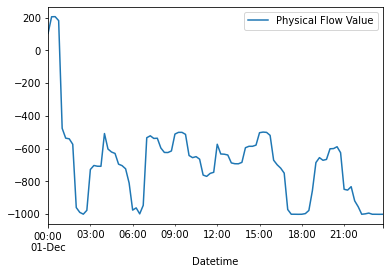

In [234]:
germany.plot(x = "Datetime", y = "Physical Flow Value")

Sure, this is not the most fancy plot. However, to get a first idea of how your data looks, this can come in handy!

## Matplotlib
<br>

Matplotlib is often used in research or scientific backgrounds. You can do all sorts of plots with it, from bar charts and histograms to scatterplots and boxplots.
There are many different ways of how to use Matplotlib, which is provided through the submodule called pyplot. 

- plt.subplots is the basic command to start with. It creates two objects:
    - a figure (fig): container that holds everything you see on the page
    - an axes object (ax): canvas on which you will draw on  
- feel free to check ou the [user guide](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py)

<img src = "./image/matplotlib_example.png" width = 400>

[Image Source](https://matplotlib.org/stable/gallery/lines_bars_and_markers/spectrum_demo.html#sphx-glr-gallery-lines-bars-and-markers-spectrum-demo-py)

## Example Matplotlib

Let's do an example plot with Matplotlib. For that, check out all countries within your dataframes. All of them represent neighbouring bidding zones:

In [225]:
energy_borders["Control area"].unique()

array(['Netherlands', 'UnitedKingdom', 'Luxembourg', 'Germany', 'France'],
      dtype=object)

In [227]:
germany = energy_borders.loc[energy_borders["Control area"] == "Germany"]
france = energy_borders.loc[energy_borders["Control area"] == "France"]

In [228]:
germany.head(3)

,Datetime,Resolution code,Control area,Physical Flow Value
3,2021-12-01 23:45:00+01:00,PT15M,Germany,-1001.788
9,2021-12-01 23:30:00+01:00,PT15M,Germany,-1002.104
13,2021-12-01 23:15:00+01:00,PT15M,Germany,-1001.796


In [229]:
france.head(3)

,Datetime,Resolution code,Control area,Physical Flow Value
4,2021-12-01 23:45:00+01:00,PT15M,France,581.908
5,2021-12-01 23:30:00+01:00,PT15M,France,691.116
10,2021-12-01 23:15:00+01:00,PT15M,France,523.224


Let's visualize!

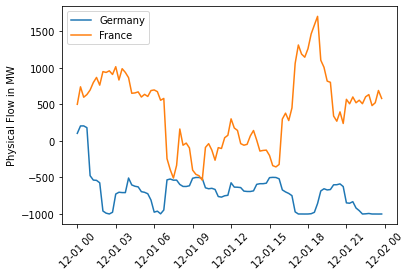

In [233]:
# import of the module and naming it plt (convention)
import matplotlib.pyplot as plt


# creating the fig, axes object
#fig is like a paper, ax is what you draw on it 
fig, ax = plt.subplots()

# adding data to our plot
ax.plot(germany["Datetime"],germany["Physical Flow Value"], label = "Germany") # adding the first line plot
ax.plot(france["Datetime"], france["Physical Flow Value"], label = "France") # adding the second line plot

ax.set_ylabel("Physical Flow in MW") # setting the label of the y axis
ax.legend() # adding a legend
plt.xticks(rotation = 45) 

#plt.xticks(rotation = 45) # changing the rotation of x-label

# showing our plot
plt.show()

### Exercise

Look at the plot above and try to add a line of code that implements a horizontal line at y = 0, which, in this case, marks the threshold of import or export. <br>
Remember, you can find basically everything in the documentation, stackoverflow or just by googling it, 

## Seaborn 

Seaborn is a data visualization library based on matplotlib. It is great for statistical data visualization. In order to work with seaborn you have to import both - matplotlib as well as seaborn. Check out the [documentation](https://seaborn.pydata.org/introduction.html) to get more info. 
<br>

<img src = "./image/seaborn_example_plot.png" width = 500>

So let's get right to it!

In [136]:
energy_borders_2 = pd.read_csv("./data/energy/physical_flow_2021_1_01.csv", sep = ";")
#do not import your Datetime as DatetimeIndex

In [137]:
energy_borders_2["Datetime"] = pd.to_datetime(energy_borders_2["Datetime"] )
#convert Datetime as Datetime Object with pd.to_datetime

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns

Select the bidding zone that you would like to visualize: 

In [122]:
energy_borders_2["Control area"].unique()

array(['Netherlands', 'UnitedKingdom', 'Luxembourg', 'Germany', 'France'],
      dtype=object)

In [123]:
luxembourg = energy_borders_2[energy_borders_2["Control area"] == "Luxembourg"]
netherlands = energy_borders_2[energy_borders_2["Control area"] == "Netherlands"]

In [96]:
luxembourg.head(3)

,Datetime,Resolution code,Control area,Physical Flow Value
2,2021-12-01 23:45:00+01:00,PT15M,Luxembourg,-53.708
7,2021-12-01 23:30:00+01:00,PT15M,Luxembourg,-57.983
12,2021-12-01 23:15:00+01:00,PT15M,Luxembourg,-24.082


In [97]:
netherlands.head(3)

,Datetime,Resolution code,Control area,Physical Flow Value
0,2021-12-01 23:45:00+01:00,PT15M,Netherlands,-419.704
6,2021-12-01 23:30:00+01:00,PT15M,Netherlands,-494.816
14,2021-12-01 23:15:00+01:00,PT15M,Netherlands,-368.288


Data visualization: 

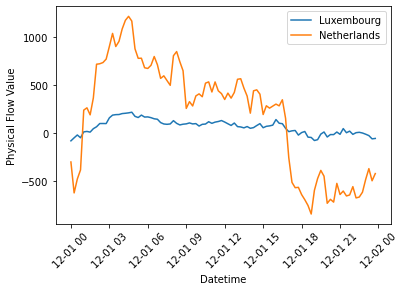

In [124]:
sns.lineplot(x = "Datetime", y = "Physical Flow Value", data = luxembourg, label = "Luxembourg") # plotting Luxembourg
sns.lineplot(x = "Datetime", y = "Physical Flow Value", data = netherlands, label = "Netherlands") # plotting Netherlands
plt.xticks(rotation=45)
plt.legend()

plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False) # transforming y labels to whole numbers
plt.show()

Cool right? Notice that the x and y labels are automatically set by the column name. <br>
You can also create a data set with multiple selected coundtries and visualize them: 

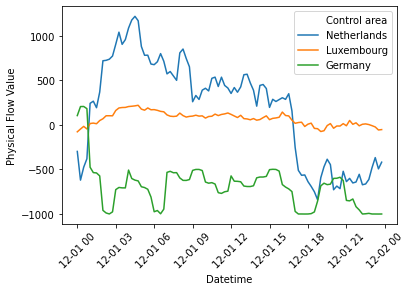

In [103]:

filter_countries = (energy_borders_2["Control area"] == "Germany") | (energy_borders_2["Control area"] == "Netherlands") | (energy_borders_2["Control area"] == "Luxembourg") 

sns.lineplot(x = "Datetime", y = "Physical Flow Value", hue = "Control area", data = energy_borders_2[filter_countries])
plt.xticks(rotation=45)
plt.show()

## Plotly
<br>

Plotly is bye far the most fun library for data visualization. The main advantage of this library is that its plot are interactive plots by default. With mouse hover functionality, interactive buttons (e.g. zoom in, etc). It is a javaScript graphing library, but has a Python wrapper, so there is no need to know JavaScript. 

There are three ways on how Plotly Figures can be created:

- **plotly.express** for simple, quick plots (px) (1)**
    - specify a DataFrame and its columns as arguments
    - quick, nice but less customization
- **plotly.graph_objects** for more customization (go)  (2)
    - go.X methods (go.Bar(), go.Scatter()
    - many more customization options, but more code needed
        - e.g. you have to call the whole Dataframe with the column
- **plotly.figure_factory** for specific, advanced figures

If you want to learn more about Plotly, check out the **Documentations** links below:

1. [Basics](https://plotly.com/python/)
2. [Plotly Express](https://plotly.com/python-api-reference/plotly.express.html)
3. [Graph_opbjects page](https://plotly.com/python-api-reference/plotly.graph_objects.html)
4. [go.Figure](https://plotly.com/python-api-reference/generated/plotly.graph_objects.Figure.html)

### Plotly Express

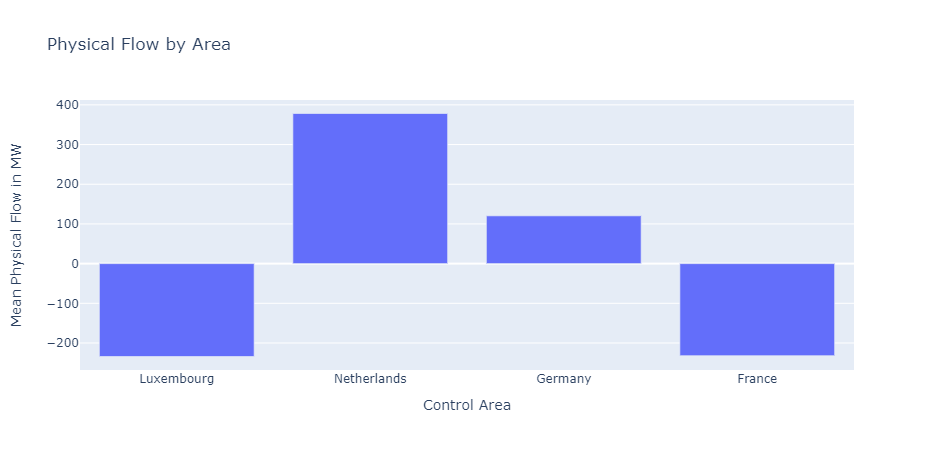

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Control Area=%{x}<br>Mean Physical Flow in MW=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa'},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['Luxembourg', 'Netherlands', 'Germany', 'France'], dtype=object),
              'xaxis': 'x',
              'y': array([-234.05,  378.23,  120.42, -232.09]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Physical Flow by Area'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Control Area'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'Mean P

In [237]:
import pandas as pd
import plotly.express as px

# creating a dummy dataframe
flow_by_area = pd.DataFrame({"Control Area":["Luxembourg", "Netherlands", "Germany", "France"], "Mean Physical Flow in MW": [-234.05,378.23,120.42,-232.09]})

#  create the plot
fig  = px.bar(data_frame = flow_by_area, x = "Control Area", y = "Mean Physical Flow in MW", title = "Physical Flow by Area")
fig.show()
print(fig)

But what if you would like to change the colour? No problem!

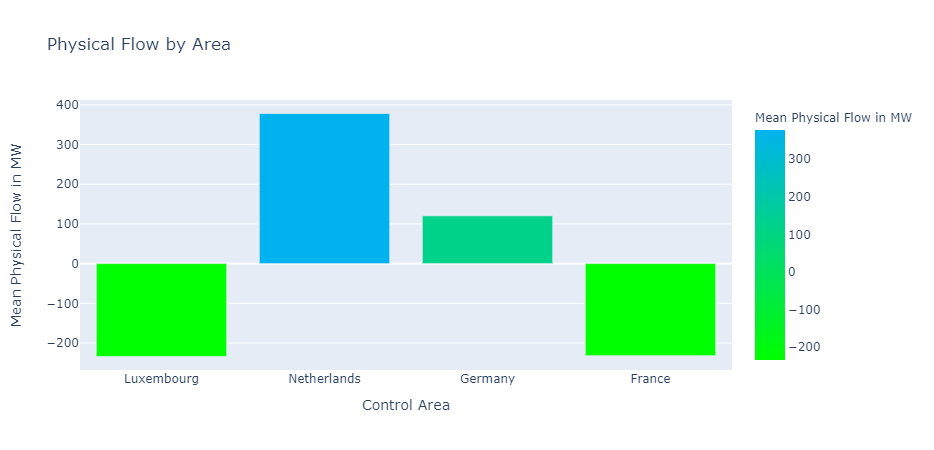

In [133]:
# creating a dummy dataframe
flow_by_area = pd.DataFrame({"Control Area":["Luxembourg", "Netherlands", "Germany", "France"], "Mean Physical Flow in MW": [-234.05,378.23,120.42,-232.09]})

#  create the graph - adding color by specificing the color argument with the column score and creating a custom scale (not necessary)
fig  = px.bar(data_frame = flow_by_area, x = "Control Area", y = "Mean Physical Flow in MW", title = "Physical Flow by Area", color="Mean Physical Flow in MW",  color_continuous_scale=["rgb(0,255,0)","rgb(0,178,238)"])
fig.show()

### Scatterplot

Scatterplot are pretty useful to observe relationships between variables. It uses dots to represent a (x,y) value pairs. In plotly, you can easily add hover or mouseover effects to display further info on each value pair. But first, let's have a look at the data you are using again: 

In [144]:
energy_borders_2.head()

,Datetime,Resolution code,Control area,Physical Flow Value
0,2021-12-01 23:45:00+01:00,PT15M,Netherlands,-419.704
1,2021-12-01 23:45:00+01:00,PT15M,UnitedKingdom,1021.774
2,2021-12-01 23:45:00+01:00,PT15M,Luxembourg,-53.708
3,2021-12-01 23:45:00+01:00,PT15M,Germany,-1001.788
4,2021-12-01 23:45:00+01:00,PT15M,France,581.908


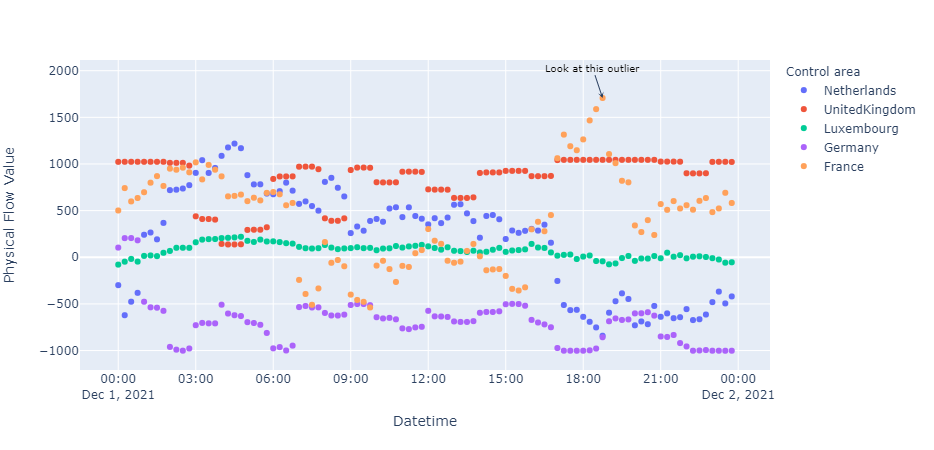

In [151]:
# Create the scatterplot
fig = px.scatter(data_frame = energy_borders_2,
  x = "Datetime", 
  y = "Physical Flow Value", 
  color = 'Control area',
  # Add columns to the hover information
  hover_data = ["Resolution code", "Control area"],
  # Add bold variable in hover information
  hover_name = 'Control area'
)

## add an annotation (floating annotation with "xref":"paper", "yref":"paper", "x":0.5, "y":0.8)
my_annotation = {"x": "2021-12-01 18:45:00+01:00", "y":1707.232, "showarrow": True, "arrowhead":3, "text": "Look at this outlier", "font": {"size": 10, "color": "black"}}
fig.update_layout({"annotations" : [my_annotation]})
# Show the plot
fig.show()

As you can see, you can do lots of cool stuff with plotly. Even annootations such as "Look at this data point" are possible! Check out the hover effects.

<br>

## Recap, Tips & Takeaways &#128161;

<br>

<div class="alert alert-block alert-success">

**Let's recap what you have learned in this chapter:**

- `df_name.plot(x = "col_name", y = "col_name")` makes it possible to quickly plot your data 
- to work with matplotlib you have to **import matplotlib.pyplot as plt** and create the fig and axes object
    - fig, ax = plt.subplots()
- to work with seaborn, you need to **import matplotlib.pyplot as plt** AND **import seaborn as sns**
- plotly is great for interactive plots
    - with `plotly.express` you can plot interactive graphs very quickly
    - to do so, you need to **import pandas as pd** AND **import plotly.express as px**
- And don't forget. You can visualize basically anything! You can easily adjust your plots, customize them, create thresholds, additional axes and so on. Just check the documentation and play around a bit.


        
</div>